<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Breast-Cancer-Detection" data-toc-modified-id="Breast-Cancer-Detection-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Breast Cancer Detection</a></span></li><li><span><a href="#Data-attributes" data-toc-modified-id="Data-attributes-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data attributes</a></span></li><li><span><a href="#Creating-the-model" data-toc-modified-id="Creating-the-model-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Creating the model</a></span><ul class="toc-item"><li><span><a href="#Splitting-into-training-and-test-data" data-toc-modified-id="Splitting-into-training-and-test-data-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Splitting into training and test data</a></span></li><li><span><a href="#Training-and-classifying-for-all-k-values" data-toc-modified-id="Training-and-classifying-for-all-k-values-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Training and classifying for all k values</a></span></li><li><span><a href="#Plotting-the-accuracy-for-each-k-value" data-toc-modified-id="Plotting-the-accuracy-for-each-k-value-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Plotting the accuracy for each k value</a></span></li><li><span><a href="#Optimal-k" data-toc-modified-id="Optimal-k-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Optimal k</a></span></li></ul></li></ul></div>

In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns

# Breast Cancer Detection

This project uses Scikit-Learn's Breast Cancer dataset.

The aim is to create a K-Nearest Neighbour classifier to predict whether a patient has breast cancer based on a number of features of the data.

The classification accuracy for the test set will be plotted for different values of k, and the optimal k value will be found.

In [2]:
breast_cancer_data = load_breast_cancer()
type(breast_cancer_data)

sklearn.utils.Bunch

# Data attributes

The list of available attributes for the Sklearn dataset can be found using tab completion - by typing `breast_cancer_data.` and pressing tab, the list becomes available.

Investigating these attributes:

In [3]:
breast_cancer_data.data

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [4]:
breast_cancer_data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [12]:
len(breast_cancer_data.feature_names)

30

In [5]:
breast_cancer_data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [6]:
breast_cancer_data.target_names

array(['malignant', 'benign'], dtype='<U9')

# Creating the model

## Splitting into training and test data

In [15]:
training_data, test_data, training_labels, test_labels = train_test_split(breast_cancer_data.data,\
                                                                          breast_cancer_data.target,\
                                                                          test_size=0.2, random_state=1)

## Training and classifying for all k values

In [54]:
# testing 100 different values for k
k_list = range(1, 101)
# training and recording the accuracy for each value of k
accuracy = []
for k in k_list:
    classifier = KNeighborsClassifier(n_neighbors=k)
    classifier.fit(training_data, training_labels)
    accuracy.append((classifier.score(test_data, test_labels)))

## Plotting the accuracy for each k value

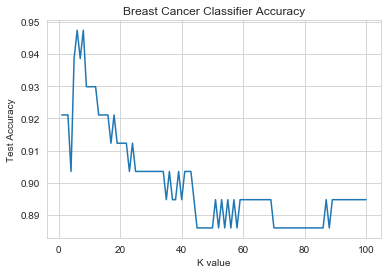

In [55]:
sns.set_style('whitegrid')
sns.lineplot(x=k_list, y=accuracy)
plt.xlabel('K value')
plt.ylabel('Test Accuracy')
plt.title('Breast Cancer Classifier Accuracy')
plt.show()

## Optimal k

The `k_list` and `accuracy` lists have the same number of elements, so the index at which the highest classification accuracy occurs in the `accuracy` list will correspond to the index of the optimal k value.

In [52]:
max_accuracy = np.max(accuracy)
max_accuracy

0.9473684210526315

In [49]:
max_acc_index = np.argmax(accuracy)
max_acc_index

5

In [51]:
optimal_k = k_list[max_acc_index]
optimal_k

6